In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import patsy
import re
%matplotlib inline

In [54]:
file_name = 'Seattle_Police_Department_911_Incident_Response.csv'
df = pd.read_csv(file_name, header=0, sep=',', low_memory=False)
df.rename(columns=lambda x : re.sub('\/|\s', '_', x), inplace=True)

In [55]:
df.shape

(1385790, 19)

In [56]:
data = df.dropna()

In [104]:
# create month/year column
at_scene_time = data['At_Scene_Time']
at_scene_time_m_y = pd.DatetimeIndex(at_scene_time).map(lambda x: x.strftime('%Y-%m'))
data['At_Scene_Time_M_Y'] = at_scene_time_m_y

In [105]:
at_scene_time_m_y_d = pd.DatetimeIndex(at_scene_time).map(lambda x: x.strftime('%Y-%m-%d'))
data['At_Scene_Time_M_Y_D'] = at_scene_time_m_y_d

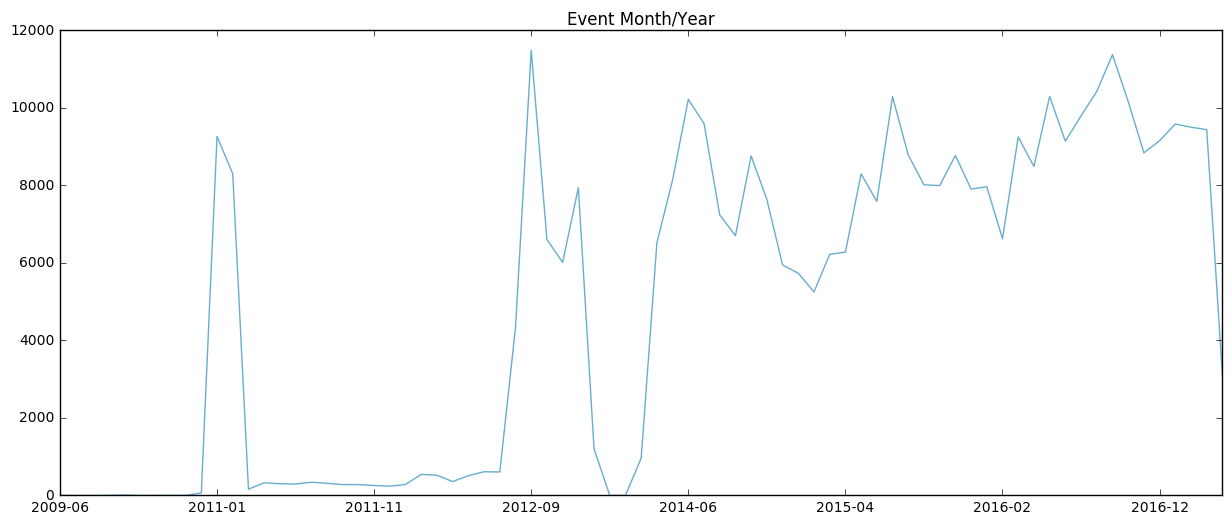

In [62]:
data['At_Scene_Time_M_Y'].value_counts().sort_index().plot(figsize=(15, 6), 
                                                  color='#67aecc', 
                                                 title='Event Month/Year');

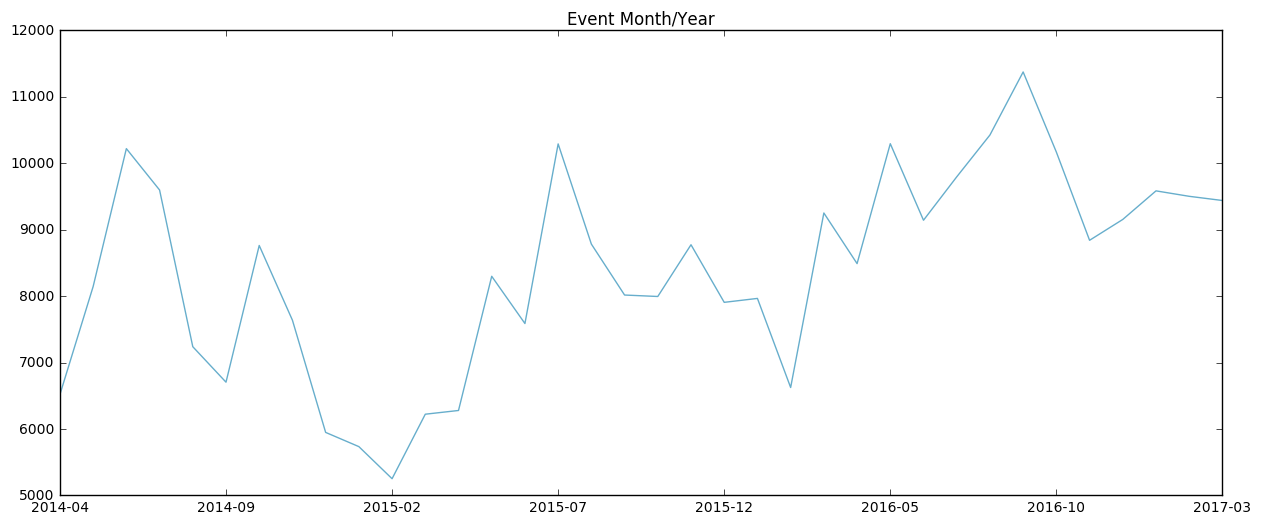

In [146]:
# The count of events from 2014-04 to 2017-03, 3 years
mask = (data['At_Scene_Time_M_Y'] > '2014-03-01') & (data['At_Scene_Time_M_Y'] < '2017-04-01') 
data = data.loc[mask]
data['At_Scene_Time_M_Y'].value_counts().sort_index().plot(figsize=(15, 6), 
                                                  color='#67aecc', 
                                                 title='Event Month/Year');

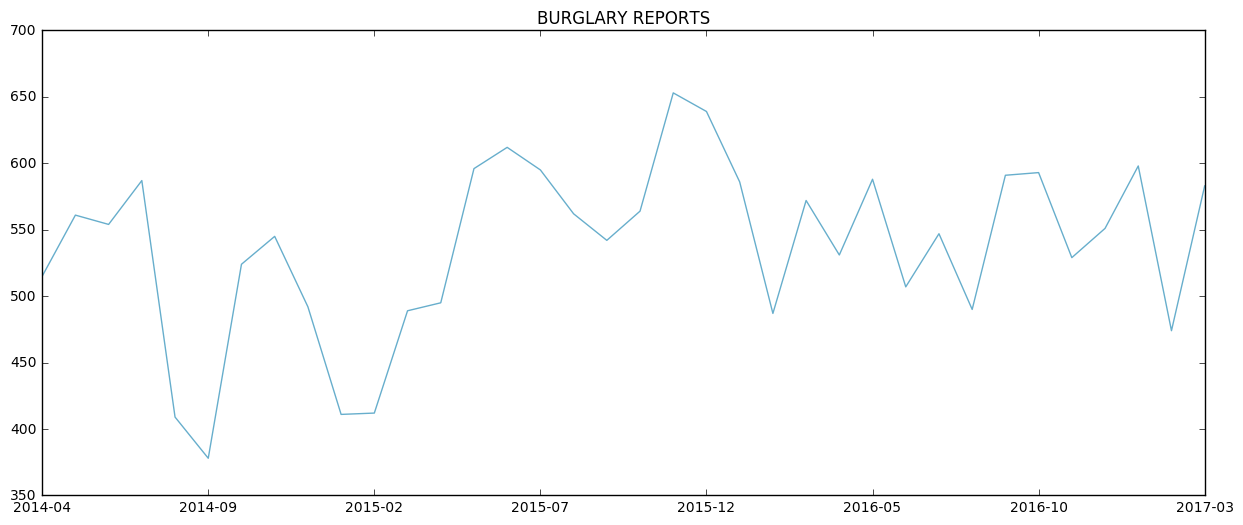

In [138]:
b = data.loc[data['Event_Clearance_Group'] == "BURGLARY"]

at_scene_time = b['At_Scene_Time']

# convert the datetime to 24 hour format
at_scene_time_b_full = pd.to_datetime(at_scene_time, format='%m/%d/%Y %I:%M:%S %p')
at_scene_time_b = at_scene_time_b_full.dt.strftime('%Y-%m')
at_scene_time_day_b = at_scene_time_b_full.dt.strftime('%Y-%m-%d')

b_counts = at_scene_time_day_b.value_counts().sort_index()

b = at_scene_time_b.value_counts().sort_index()
b.plot(figsize=(15, 6),color='#67aecc', title='BURGLARY REPORTS');

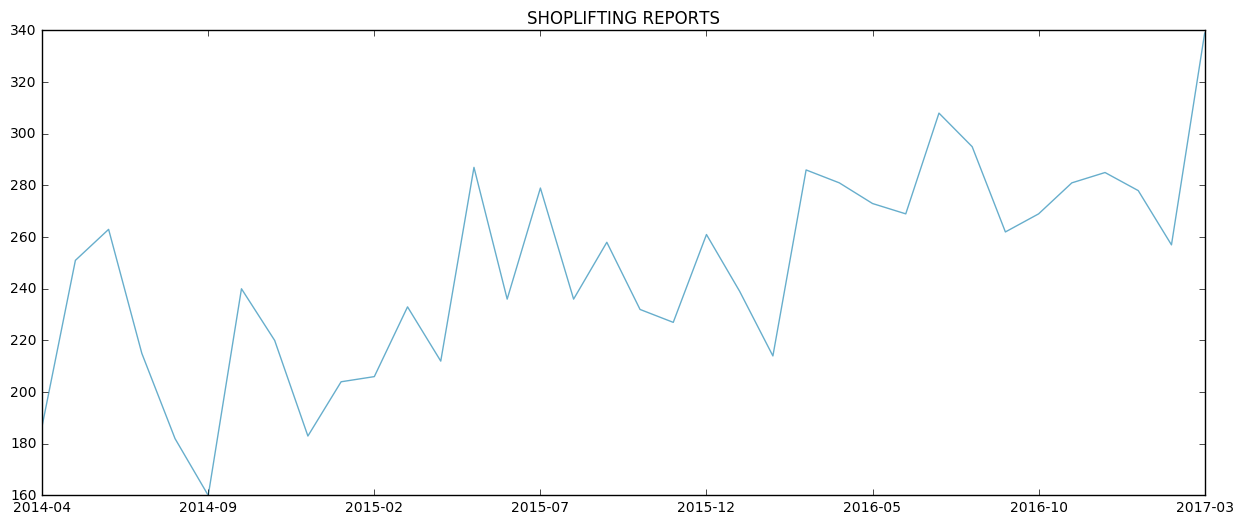

In [186]:
s = data.loc[data['Event_Clearance_Group'] == "SHOPLIFTING"]
# plot the frequency of incidents in a day
at_scene_time = s['At_Scene_Time']

# convert the datetime to 24 hour format
at_scene_time_s_full = pd.to_datetime(at_scene_time, format='%m/%d/%Y %I:%M:%S %p')
at_scene_time_s = at_scene_time_s_full.dt.strftime('%Y-%m')
at_scene_time_day_s = at_scene_time_s_full.dt.strftime('%Y-%m-%d')

s_counts = at_scene_time_day_s.value_counts().sort_index()
s = at_scene_time_s.value_counts().sort_index()

s.plot(figsize=(15, 6),color='#67aecc', title='SHOPLIFTING REPORTS');

In [249]:
import datetime as dt
date = sorted(data['At_Scene_Time_M_Y'].unique())
b_date = sorted(at_scene_time_day_b.unique())
s_date = sorted(at_scene_time_day_s.unique())
# convert datetime to ordinal numbers for training

date = pd.to_datetime(date)
b_date = pd.to_datetime(b_date)
s_date = pd.to_datetime(s_date)
date = date.map(dt.datetime.toordinal)
b_date = b_date.map(dt.datetime.toordinal)
s_date = s_date.map(dt.datetime.toordinal)

Burglary Coefficients: 
 [ 0.00156768]
Burglary Mean squared error: 34.62
Burglary Variance score: -0.01


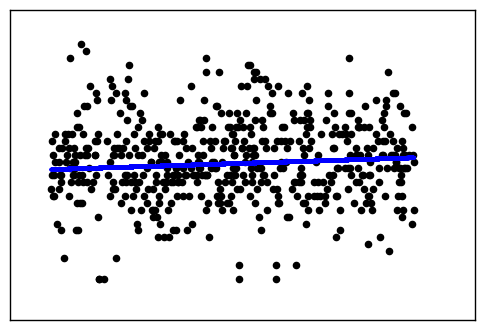

In [250]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

y = b_counts
X = np.asarray(b_date)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X,y,train_size=0.5,random_state=42)
X_train_b = X_train_b.reshape(len(X_train_b), 1)
X_test_b = X_test_b.reshape(len(X_test_b), 1)

regr_b = linear_model.LinearRegression()
regr_b.fit(X_train_b, y_train_b) #train model on train data


# The coefficients
print('Burglary Coefficients: \n', regr_b.coef_)
# The mean squared error
print("Burglary Mean squared error: %.2f"
      % np.mean((regr_b.predict(X_test_b) - y_test_b) ** 2))
# Explained variance score: 1 is perfect prediction
print('Burglary Variance score: %.2f' % regr_b.score(X_test_b, y_test_b))


# Plot outputs
plt.scatter(X_test_b, y_test_b,  color='black')
plt.plot(X_test_b, regr_b.predict(X_test_b), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Shoplifting Coefficients: 
 [ 0.0027724]
Shoplifting Mean squared error: 11.53
Shoplifting Variance score: 0.02


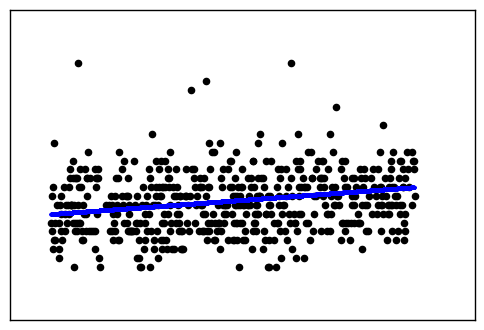

In [251]:
y = s_counts
X = np.asarray(s_date)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X,y,train_size=0.5,random_state=42)
X_train_s = X_train_s.reshape(len(X_train_s), 1)
X_test_s = X_test_s.reshape(len(X_test_s), 1)

regr_s = linear_model.LinearRegression()
regr_s.fit(X_train_s, y_train_s) #train model on train data


# The coefficients
print('Shoplifting Coefficients: \n', regr_s.coef_)
# The mean squared error
print("Shoplifting Mean squared error: %.2f"
      % np.mean((regr_s.predict(X_test_s) - y_test_s) ** 2))
# Explained variance score: 1 is perfect prediction
print('Shoplifting Variance score: %.2f' % regr_s.score(X_test_s, y_test_s))


# Plot outputs
plt.scatter(X_test_s, y_test_s,  color='black')
plt.plot(X_test_s, regr_s.predict(X_test_s), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Burglary Model Coefficients: 
 [ 0.00156768]
Burglary Model Mean squared error: 34.62
Burglary Model Variance score: -0.01

Shoplifting Model Coefficients: 
 [ 0.0027724]
Shoplifting Model Mean squared error: 11.53
Shoplifting Model Variance score: 0.02


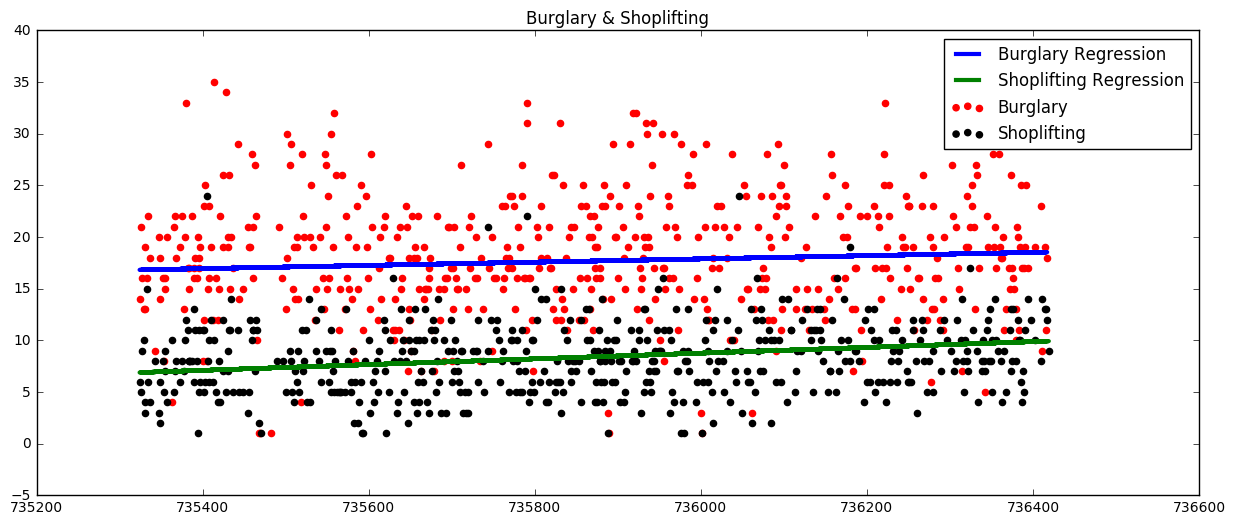

In [252]:
fig, ax = plt.subplots(figsize = (15,6))
ax.scatter(X_test_b, y_test_b,  color='red', label='Burglary')
ax.plot(X_test_b, regr_b.predict(X_test_b), color='blue',
         linewidth=3, label='Burglary Regression')
ax.scatter(X_test_s, y_test_s,  color='black', label = 'Shoplifting')
ax.plot(X_test_s, regr_s.predict(X_test_s), color='green',
         linewidth=3, label='Shoplifting Regression')

ax.legend()
ax.set_title("Burglary & Shoplifting")

# The coefficients
print('Burglary Model Coefficients: \n', regr_b.coef_)
# The mean squared error
print("Burglary Model Mean squared error: %.2f"
      % np.mean((regr_b.predict(X_test_b) - y_test_b) ** 2))
# Explained variance score: 1 is perfect prediction
print('Burglary Model Variance score: %.2f' % regr_b.score(X_test_b, y_test_b))
print()
# The coefficients
print('Shoplifting Model Coefficients: \n', regr_s.coef_)
# The mean squared error
print("Shoplifting Model Mean squared error: %.2f"
      % np.mean((regr_s.predict(X_test_s) - y_test_s) ** 2))
# Explained variance score: 1 is perfect prediction
print('Shoplifting Model Variance score: %.2f' % regr_s.score(X_test_s, y_test_s))

Coefficients: 
 [ 1.35756197]
Mean squared error: 1674024.95
Variance score: 0.32


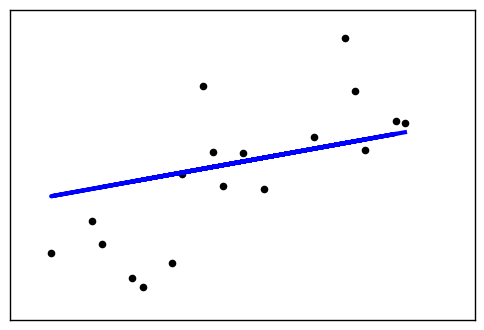

In [215]:


y = count
X = np.asarray(date)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.5,random_state=42)
X_train = X_train.reshape(len(X_train), 1)
X_test = X_test.reshape(len(X_test), 1)
# y_train = pd.DataFrame(y_train)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train) #train model on train data


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))


# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, regr.predict(X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

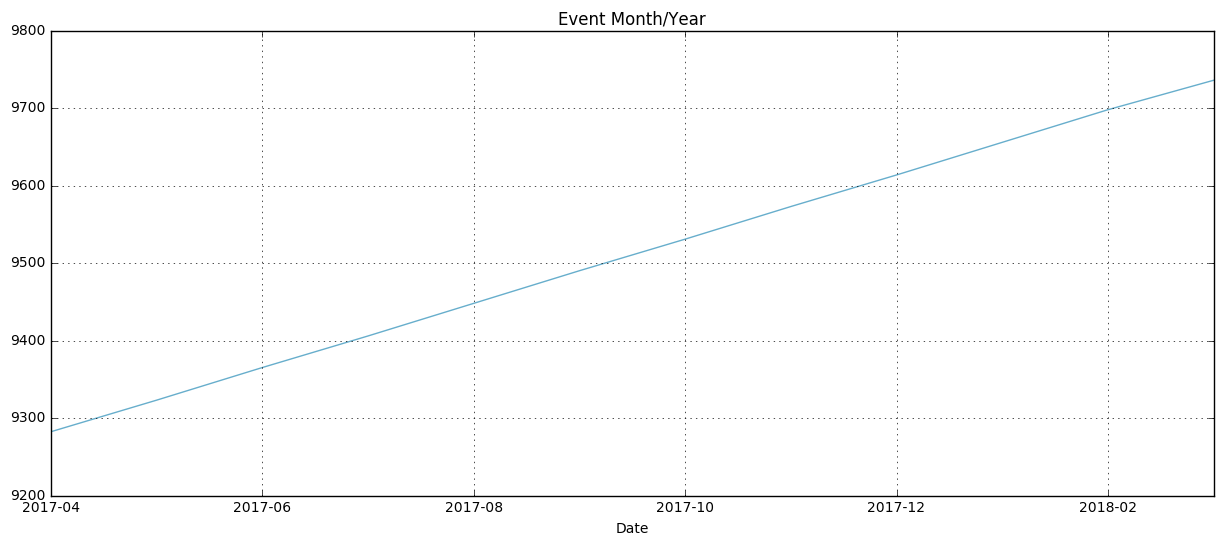

In [33]:
# predict 

year_17_to_18 = ["2017-04","2017-05","2017-06","2017-07","2017-08","2017-09","2017-10","2017-11","2017-12","2018-01",
                "2018-02","2018-03"]

prediction_yr = [dt.datetime.strptime(time,"%Y-%m") for time in year_17_to_18]
prediction_yr = np.asarray([dt.datetime.toordinal(x) for x in prediction_yr])


events = regr.predict(prediction_yr.reshape(len(year_17_to_18), 1))

pred = {}
i = 0
for month in year_17_to_18:
    pred[month] = events[i]
    i += 1
    
pred = pd.Series(pred, name='DateValue')
pred.index.name = 'Date'
pred.plot(figsize=(15, 6),  color='#67aecc', title='Event Month/Year', grid=True);